In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from inspect_util import Chunk

In [2]:
df = pd.read_csv('data/partial_order_result.csv')
df.head()

,chunk_id,violates_partial_order,chunk_size,resolution_size
0,776662,False,25,13
1,776782,True,121,102
2,776793,False,13,6
3,776828,False,12,4
4,776863,False,13,6


### What is the percentage of chunks that violates the partial order in the resolution?

In [3]:
violates_partial_order = df[df['violates_partial_order'] == True]
does_not_violate = df[df['violates_partial_order'] == False]
print(f'{(len(violates_partial_order)/len(df))*100:.2f}%')

16.92%


### Characteristics of chunks where the resolution violates the partial order

In [4]:
violates_partial_order[['chunk_size','resolution_size']].describe().round(2)

,chunk_size,resolution_size
count,2297.00,2297.00
mean,354.12,183.37
std,1209.98,605.56
min,10.00,3.00
25%,29.00,15.00
50%,55.00,32.00
75%,206.00,115.00
max,27116.00,13034.00


<AxesSubplot:>

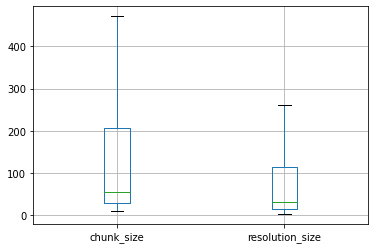

In [5]:
violates_partial_order[['chunk_size', 'resolution_size']].boxplot(showfliers=False)

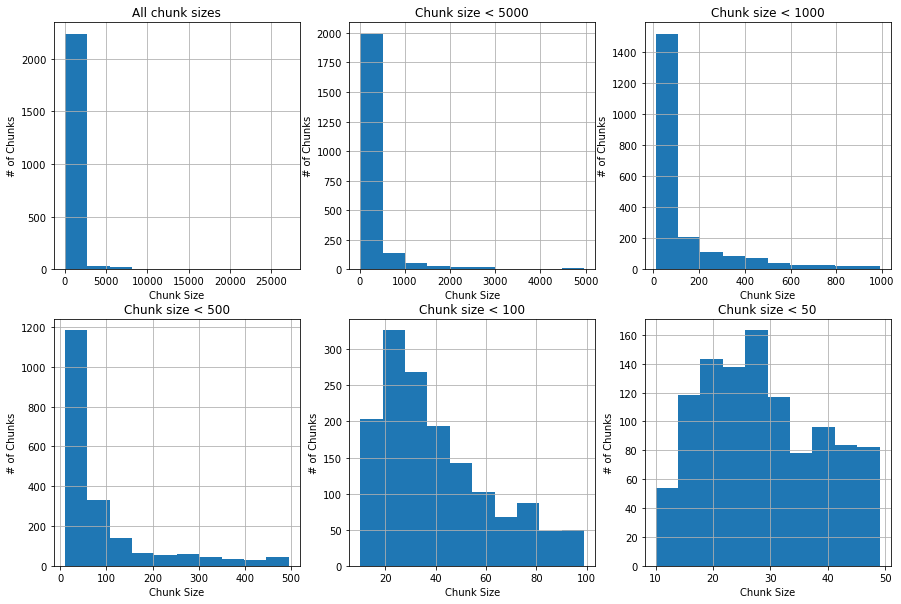

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
violates_partial_order['chunk_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All chunk sizes')

violates_partial_order[violates_partial_order['chunk_size'] < 5000]['chunk_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Chunk size < 5000')

violates_partial_order[violates_partial_order['chunk_size'] < 1000]['chunk_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Chunk size < 1000')

violates_partial_order[violates_partial_order['chunk_size'] < 500]['chunk_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Chunk size < 500')

violates_partial_order[violates_partial_order['chunk_size'] < 100]['chunk_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Chunk size < 100')

violates_partial_order[violates_partial_order['chunk_size'] < 50]['chunk_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Chunk size < 50')


for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Chunk Size")
        ax[i][j].set_ylabel("# of Chunks")

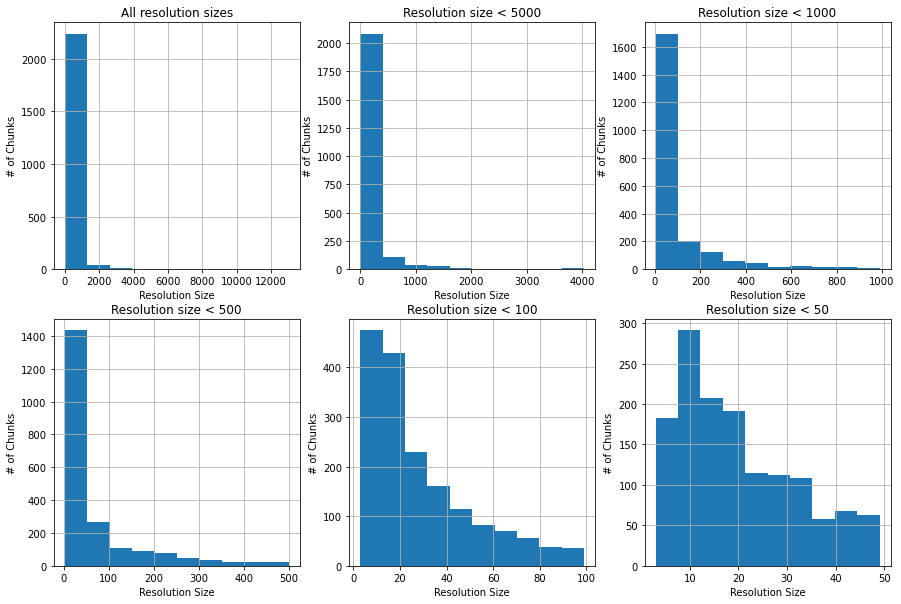

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
violates_partial_order['resolution_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All resolution sizes')

violates_partial_order[violates_partial_order['resolution_size'] < 5000]['resolution_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Resolution size < 5000')

violates_partial_order[violates_partial_order['resolution_size'] < 1000]['resolution_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Resolution size < 1000')

violates_partial_order[violates_partial_order['resolution_size'] < 500]['resolution_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Resolution size < 500')

violates_partial_order[violates_partial_order['resolution_size'] < 100]['resolution_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Resolution size < 100')

violates_partial_order[violates_partial_order['resolution_size'] < 50]['resolution_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Resolution size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Resolution Size")
        ax[i][j].set_ylabel("# of Chunks")

### Characteristics of chunks where the resolution does not violate the partial order

In [8]:
does_not_violate[['chunk_size','resolution_size']].describe().round(2)

,chunk_size,resolution_size
count,11261.00,11261.00
mean,18.06,6.23
std,45.72,6.61
min,8.00,2.00
25%,11.00,3.00
50%,13.00,4.00
75%,18.00,7.00
max,2637.00,175.00


<AxesSubplot:>

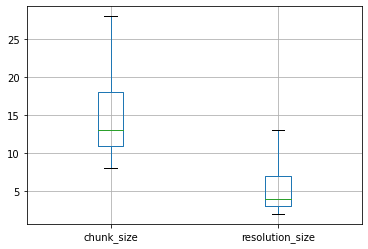

In [9]:
does_not_violate[['chunk_size', 'resolution_size']].boxplot(showfliers=False)

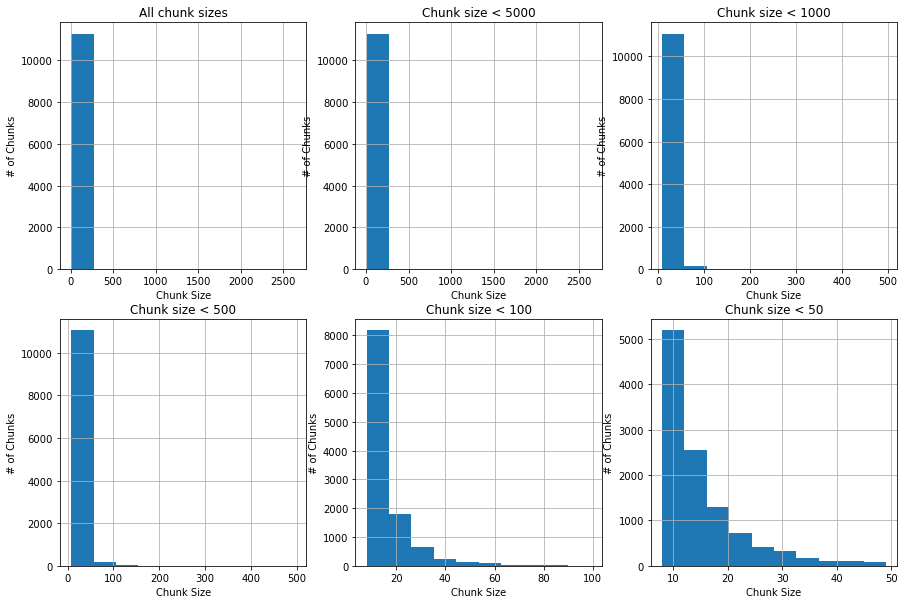

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
does_not_violate['chunk_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All chunk sizes')

does_not_violate[does_not_violate['chunk_size'] < 5000]['chunk_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Chunk size < 5000')

does_not_violate[does_not_violate['chunk_size'] < 1000]['chunk_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Chunk size < 1000')

does_not_violate[does_not_violate['chunk_size'] < 500]['chunk_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Chunk size < 500')

does_not_violate[does_not_violate['chunk_size'] < 100]['chunk_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Chunk size < 100')

does_not_violate[does_not_violate['chunk_size'] < 50]['chunk_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Chunk size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Chunk Size")
        ax[i][j].set_ylabel("# of Chunks")

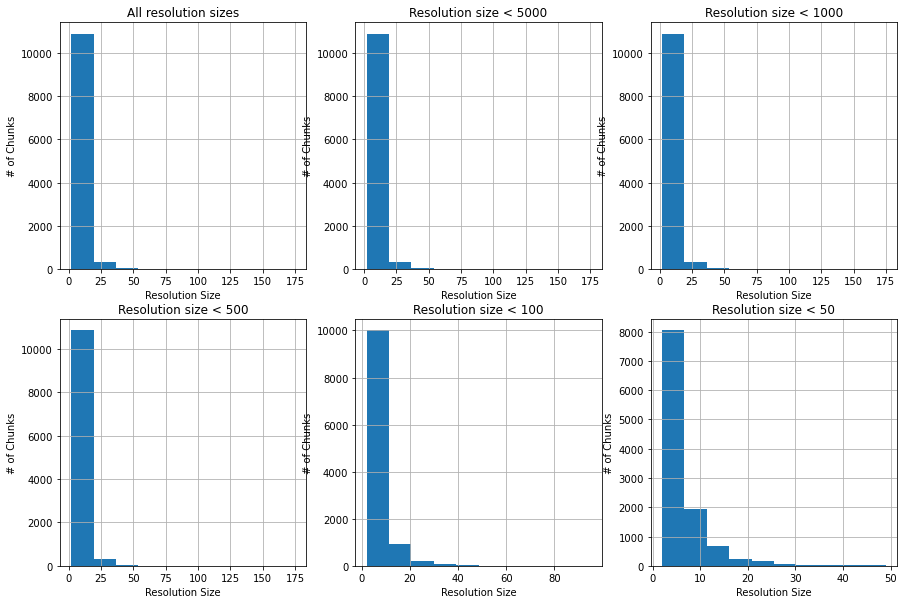

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
does_not_violate['resolution_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All resolution sizes')

does_not_violate[does_not_violate['resolution_size'] < 5000]['resolution_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Resolution size < 5000')

does_not_violate[does_not_violate['resolution_size'] < 1000]['resolution_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Resolution size < 1000')

does_not_violate[does_not_violate['resolution_size'] < 500]['resolution_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Resolution size < 500')

does_not_violate[does_not_violate['resolution_size'] < 100]['resolution_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Resolution size < 100')

does_not_violate[does_not_violate['resolution_size'] < 50]['resolution_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Resolution size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Resolution Size")
        ax[i][j].set_ylabel("# of Chunks")

### Random sample of small chunks that violate the partial order

In [12]:
sample = violates_partial_order[violates_partial_order['chunk_size'] <= 12].sample(10, random_state = 42)
sample.head()

,chunk_id,violates_partial_order,chunk_size,resolution_size
11921,1410297,True,12,4
6741,1076439,True,11,6
10064,1288373,True,12,4
8449,1140412,True,12,5
3585,960947,True,12,4


#### Chunk 1

In [13]:
chunk1 = Chunk(sample.iloc[0]['chunk_id'])

##### Conflicting chunk text

In [14]:
print(chunk1.get_conflict_text())


public class PetStoreContext {

<<<<<<<
	private static final String JDBC_URL = "jdbc.url";
    private static final String MYSQL_TEST_DATABASE = "jdbc:mysql://localhost:3306/petstore_test";
    private static final String MIGRATION_PROPERTIES_FILE = "/migration.properties";
    private static final String JDBC_URL = "jdbc.url";
    private static final String DEFAULT_MYSQL_TEST_DATABASE = "jdbc:mysql://localhost:3306/petstore_test";
>>>>>>>

    private static ApplicationContext applicationContext;





##### Resolution

In [15]:
print(chunk1.resolution)


public class PetStoreContext {

	private static final String MIGRATION_PROPERTIES_FILE = "/migration.properties";
    private static final String JDBC_URL = "jdbc.url";
    private static final String DEFAULT_MYSQL_TEST_DATABASE = "jdbc:mysql://localhost:3306/petstore_test";





The line containing "private static final String MIGRATION_PROPERTIES_FILE = "/migration.properties";" was moved to the top of the resolution.

#### Chunk 2

In [16]:
chunk2 = Chunk(sample.iloc[1]['chunk_id'])

##### Conflicting chunk text

In [17]:
print(chunk2.get_conflict_text())

package cuke4duke.internal.java;

<<<<<<<
import cuke4duke.*;
import cuke4duke.internal.language.ProgrammingLanguage;
import cuke4duke.internal.language.StepDefinition;
import cuke4duke.internal.language.LanguageMixin;

>>>>>>>
import java.lang.reflect.Constructor;
import java.lang.reflect.InvocationTargetException;
import java.lang.reflect.Method;




##### 

##### Resolution

In [18]:
print(chunk2.resolution)

package cuke4duke.internal.java;

import cuke4duke.*;
import cuke4duke.internal.language.LanguageMixin;
import cuke4duke.internal.language.ProgrammingLanguage;
import cuke4duke.internal.language.StepDefinition;

import java.lang.reflect.Constructor;
import java.lang.reflect.InvocationTargetException;
import java.lang.reflect.Method;



The order of the imports was changed in the resolution

##### Chunk 3

In [19]:
chunk3 = Chunk(sample.iloc[2]['chunk_id'])

##### Conflicting chunk text

In [20]:
print(chunk3.get_conflict_text())


import com.nononsenseapps.notepad.FragmentLayout;
import com.nononsenseapps.notepad.NotePad;
<<<<<<<
import com.nononsenseapps.notepad.NotesPreferenceFragment;
import com.nononsenseapps.notepad_donate.R;
import com.nononsenseapps.notepad_donate.widget.ListWidgetProvider;
import com.nononsenseapps.notepad.R;
import com.nononsenseapps.notepad.prefs.MainPrefs;
>>>>>>>

import android.app.ActionBar;
import android.app.Activity;




##### Resolution

In [21]:
print(chunk3.resolution)


import com.nononsenseapps.notepad.FragmentLayout;
import com.nononsenseapps.notepad.NotePad;
import com.nononsenseapps.notepad_donate.widget.ListWidgetProvider;
import com.nononsenseapps.notepad_donate.R;
import com.nononsenseapps.notepad.prefs.MainPrefs;

import android.app.ActionBar;
import android.app.Activity;



The line containing "import com.nononsenseapps.notepad_donate.widget.ListWidgetProvider;" was changed in the resolution

##### Chunk 4

In [22]:
chunk4 = Chunk(sample.iloc[3]['chunk_id'])

##### Conflicting chunk text

In [23]:
print(chunk4.get_conflict_text())

import com.t_oster.visicut.model.VectorProfile;
import com.t_oster.visicut.model.graphicelements.psvgsupport.ParametricPlfPart;
import com.t_oster.visicut.model.mapping.MappingSet;
<<<<<<<
import com.tur0kk.SocialPlatformIcon;
import com.tur0kk.facebook.FacebookManager;
import com.tur0kk.facebook.gui.FacebookDialog;
import com.tur0kk.thingiverse.ThingiverseManager;
import com.tur0kk.SocialPlatformIcon;
>>>>>>>
import java.awt.Desktop;
import java.awt.Dimension;
import java.awt.FileDialog;




##### Resolution

In [24]:
print(chunk4.resolution)

import com.t_oster.visicut.model.VectorProfile;
import com.t_oster.visicut.model.graphicelements.psvgsupport.ParametricPlfPart;
import com.t_oster.visicut.model.mapping.MappingSet;
import com.tur0kk.SocialPlatformIcon;
import com.tur0kk.facebook.FacebookManager;
import com.tur0kk.facebook.gui.FacebookDialog;
import com.tur0kk.thingiverse.ThingiverseManager;
import java.awt.Desktop;
import java.awt.Dimension;
import java.awt.FileDialog;



The line containing "import com.tur0kk.SocialPlatformIcon;" appears in both sides of the chunk. In V1, its index is 1, while in V2 its index is 2. It is the first line in the resolution (after context).
The line "import com.tur0kk.thingiverse.ThingiverseManager;" appears in V2 at index 1. However it appears in the resolution after the occurrence of the "import com.tur0kk.SocialPlatformIcon;" line. Thus, the partial order from V2 is violated.

##### Chunk 5

In [25]:
chunk5 = Chunk(sample.iloc[4]['chunk_id'])

##### Conflicting chunk text

In [26]:
print(chunk5.get_conflict_text())

        .put("thesuntvpicks", TheSunModule.class)
        .put("rovi", RoviModule.class)
        .put("rte", RteModule.class)
<<<<<<<
        .put("btvod", BtVodModule.class)
        .put("bbc-audience-data", AudienceModule.class)
        .put("bt-channels", BtChannelsModule.class)
        .put("bbc-audience-data", AudienceModule.class)
        .put("btvod", BtVodModule.class)
>>>>>>>
    .build();

    public Iterable<? extends Class<?>> enabledModules() {




##### Resolution

In [27]:
print(chunk5.resolution)

        .put("thesuntvpicks", TheSunModule.class)
        .put("rovi", RoviModule.class)
        .put("rte", RteModule.class)
        .put("btvod", BtVodModule.class)
        .put("bbc-audience-data", AudienceModule.class)
        .put("bt-channels", BtChannelsModule.class)
    .build();

    public Iterable<? extends Class<?>> enabledModules() {



The line containing ".put("btvod", BtVodModule.class)" appears in both sides of the chunk. In V1, its index is 1, while in V2 its index is 3. It is the first line in the resolution (after context).
The line ".put("bbc-audience-data", AudienceModule.class)" appears in V2 at index 2. However it appears in the resolution after the occurrence of the ".put("btvod", BtVodModule.class)" line. Thus, the partial order from V2 is violated.